![title](img/NumPy.jpeg)

# Programming for Data Analysis Practical Assignment 2018


## Create a Jupyter notebook explaining the use of the numpy.random package in Python. Including detailed explainations of at lease five of the distributions provided for the package. 

## There are four distinct tasks to be carried out:


### 1. Explain the overall purpose of the package.

### 2. Explain the use of the "Simple random data" and Permutations" functions.

### 3. Explain the use and purpose of at least five "Distributions" functions.

### 4. Explain the use of seeds in generating pseudorandom numbers.

In [1]:
# Import the NumPy package for array operations and matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Task 1
#### Explain the overall purpose of the package

Although NumPy, short for Numerical Python, does not provide modelling or scientific functionality it is a powerful tool package for efficient multidimensional array operations. Enabling reading and writing arithmatic operations on large arrays of data without having to write loops. It includeS a C Application Programming Interface (API) that connects it with C, C++ and FORTRAN libraries. Features include useful linear algebra, Fourier transform, and random number capabilities.  

NumPy can create random numbers based on different types of statistical distribution. Random numbers have many important applications, from the crytography used to keep things like banking transactions secure to the selection of samples from population for statistical analysis.

numpy.random is a routine docstring in the NumPy package for the generation of pseudorandom numbers. The generation of pseudorandom numbers is based on the Mersenne Twister: a 623-dimensionally equidistributed uniform pseudorandom number generator (also known as PRNG's). 

The Mersenne Twister was first proposed in 1998 by Makato Matsumoto and Takuji Nishimura of Keio University to solve the problem of generating 'high-quality' random numbers with computers, it is now the basis of how the NumPy package creates pseudorandom numbers. It is important to note that PRNG's are not truly random numbers, they are based on complex algorithms such as MT19937. Seeds are used to create a vector a starting point within the algorithm, from which the random numbers are generated. A seed may be automatically selected based on a computer system's random number generator device or its clock. A seed can also be set by the user, and if the same seed is used in the future the same set of random numbers is created.

### Task 2
#### Explain the use of "Simple random data" and "Permutations" functions

#### Simple random data

The NumPy v1.15 manual lists ten functions for Random Sampling of Simple random data, however four are essentially duplicates that return random floats in the half-open interval. 

In [2]:
# Create a three dimensional random array based on a uniform distribution
np.random.randn(3,2, 3)

array([[[ 0.57572335,  0.20956515,  0.23423033],
        [ 0.79058388,  1.21387193, -2.68344183]],

       [[-0.85229213, -0.8653105 , -1.21781576],
        [ 1.02910486,  0.96494457,  0.31678261]],

       [[-0.34947416,  1.79043577,  1.67143852],
        [-0.05433636, -0.66111078,  0.89072053]]])

<function matplotlib.pyplot.show(*args, **kw)>

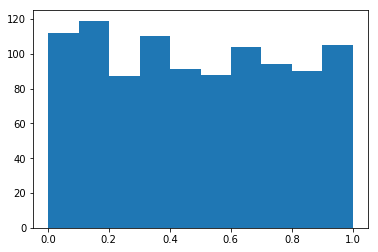

In [3]:
plt.hist(np.random.rand(1000))
plt.show


#### The permutations function randomly arranges a series of numbers

#### This can be done either by specifying a range

In [4]:
# Imagine assigning a number to each card in a deck of cards and creating a program to shuffle them randomly
np.random.permutation(range(1, 53))

array([ 2, 46, 39, 43, 14,  4, 28, 50, 40, 41, 26, 35, 15,  9, 16, 12, 18,
       36, 33, 44, 47, 21, 23,  1, 38, 25, 42, 37, 19, 45,  6, 13, 29, 11,
        5, 30, 48, 32, 49, 52, 51, 17, 31, 27, 22, 10, 20,  7,  3, 24, 34,
        8])

#### Or by passing a list

In [5]:
# Arrange a list face cards a random order
np.random.permutation(['Ace', 'Queen', 'King', 'Jack', 'Joker'])

array(['King', 'Joker', 'Jack', 'Queen', 'Ace'], dtype='<U5')

### Task 3
#### Explain the use and purpose of at least 5 "Distributions" functions

#### Binomial distributions

Binomial distributions give the discrete (whole number) probability distribution for obtaining a number of successes out of a series of trials and can be expressed by the equation:

![title](img/binomial.jpg)

Where P is the probability, and n is the number of successes out of N Bernoulli trials. 

Binomial distributions are the result of repeated trials were there are two possible outcomes, typically termed either success or failure. The probability of success is constant and the trials are independent, in such the outcome of one or more of the trails do not effect one another. Coin tosses are often used to illustate binomial experiments as there are two possible outcomes, either heads or tails. If the desired outcome is heads, and the coin is unbiased, the probability of tossing the coin and successfully obtaining a heads is 50%. 



In [6]:
"""numpy.random.binomial(n, p, size=None) n = number of trials, p = probability of successfull outcomes, 
size = times the trials are repeated"""

# Toss a coin ten times, the binomial function randomly selects how many times 'heads' is returned.

np.random.binomial(10, 0.5, 10)


array([5, 5, 9, 6, 6, 4, 6, 4, 5, 4])

The above array displays, according to a binomial distribution, the randomly selected times that 'heads' has been returned for 10 coin tosses, repeated 10 times. 

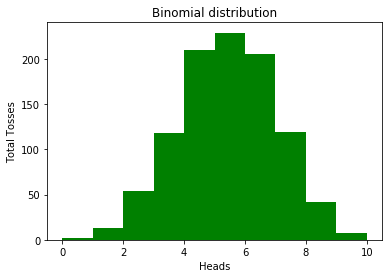

In [7]:
"""Charting in a histogram of a binomial distribution you can see who often heads was returned for each set of 10 coin tosses
this time repeated 1000 times"""

plt.hist(np.random.binomial(10, 0.5, 1000), color='g')
plt.xlabel('Heads')
plt.ylabel('Total Tosses')
plt.title("Binomial distribution")
plt.show()

#### A chisquare distribution

This function returns randomly drawn samples from a chi-square distribution according to the parameters provided. 

![title](img/chi.png)

Where O equals the observed values and E equals expected values. Chi-squared is equal to the sum of all the observed values, minus the expected values, squared, and divided by the expected values. 

The chi-squared test is used in hypothesis testing as it measures to what extent differences in observed values could be due to chance, because it measures how well the observed distribution of data fits with the distribution that would be expected if the variables were independent.

It is only used for categorical (nominal) values, values that can be counted and divided into categories, and cannot be used for solely numerical (ordinal) values. For instance you could ask a random sample of people do would they prefer to win a beach holiday or a hiking holiday. Divide the sample popluation into male and female categories, and then perform a chi-squared test to indicate if gender influences which type of holiday is preferred. 

In numpy.random.chisquare(df, size=None) df is equal to the degrees of freedom and must be greater than zero. Degrees of freedom are defined as the number of independent values or quantities which can be assigned to a statistical distribution. Size is equal to the number of samples drawn. 



In [8]:
# Select randomly select 4 samples with two degrees of freedom
np.random.chisquare(2, 4)

array([3.27109336, 1.25497457, 2.90031   , 0.31217781])

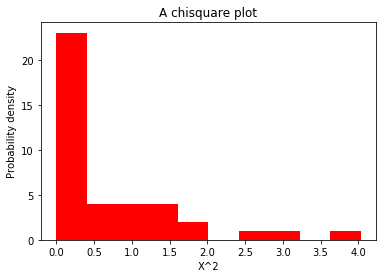

In [9]:
# Plot a histogram randomly selecting 40 samples with one degree of freedom

plt.hist(np.random.chisquare(1, 40),color='r')
plt.xlabel('X^2')
plt.ylabel('Probability density')
plt.title("A chisquare plot")
plt.show()

#### A normal distribution
Data is normally distributed when 50% of the values are above the mean and 50% are below the mean. In other words mean = median = mode. And where 99.7% of the data is within three standard deviations of the mean.

The probablility of a normal distribution is mathematically expressed as:

![title](img/normal.jpg)

The numpy.random.normal() distribtion function will randomly generate values according to this normal distribution. 

In [10]:
# Generate ten random number is a normal distribution, centered around a mean of zero with a standard deviation of one.
np.random.normal(0, 1.0, 10)

array([-0.55173265, -0.75350849, -0.13769034, -0.37969988,  1.50289579,
       -2.05692713, -0.67778997,  0.7272096 , -0.57904362, -0.58110797])

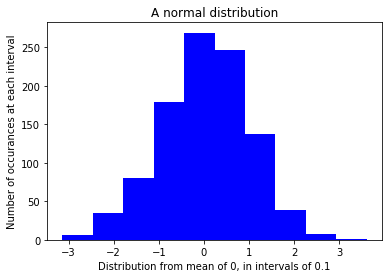

In [11]:
# Plot a histogram of 1000 normally distributed intergers, centered around a mean of zero, with a standard deviation of one. 

plt.hist(np.random.normal(0, 1.0, 1000), color='b')
plt.xlabel('Distribution from mean of 0, in intervals of 0.1')
plt.ylabel('Number of occurances at each interval')
plt.title("A normal distribution")
plt.show()

#### A pareto distribution
A Pareto distribution is based on the Pareto Principle that describes how inputs and outputs are unbalanced. It is named after economist Vilfredo Pareto and originated when he proposed that 80% of the land in Italy was owned by 20% of the population. It is commonly used in business to describe either that 80% of output is generated from 20% of the input. For instance 80% of revenue is generated by 20% of customers. As well as in continuous improvement, when it is often described you can get 80% of the benefits by addressing 20% of the problems. 

A pareto distribution is expressed mathematically as follows:

![title](img/pareto.jpg)

numpy.random.pareto() generates random samples from a pareto distribution where you input the shape (aka slope or Pareto Index) of the distribution and number of samples to be drawn. 

In [12]:
# Generate 10 random numbers with a pareto distribution with a Pareto Index of 1
np.random.pareto(1, 10)

array([2.78104706, 0.89948887, 1.00351212, 0.07681662, 0.18075725,
       4.12487534, 1.44251543, 0.16999356, 0.02381281, 6.47463783])

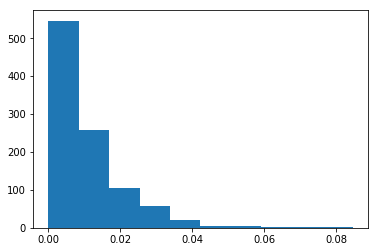

In [25]:
# Plot 1000 values on a Pareto Histogram with a slope of ten. 80% (800) of these values
plt.hist(np.random.pareto(100, size=1000))
plt.show()

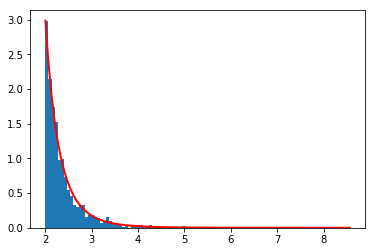

In [14]:
a, m = 6, 2  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m
count, bins, _ = plt.hist(s, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

In [15]:
np.random.uniform(low=0.0, high=1.0, size=10)

array([0.45267566, 0.56111946, 0.1089198 , 0.58093662, 0.07736662,
       0.49438877, 0.98153279, 0.07304086, 0.8467837 , 0.86967751])

#### A uniform distribution

![title](img/uniform.jpg)


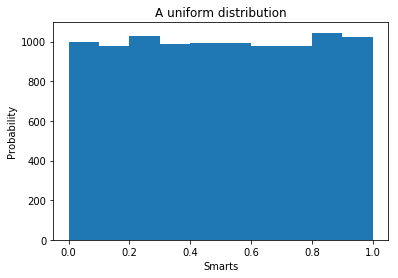

In [16]:
plt.hist(np.random.uniform(low=0.0, high=1.0, size=10000))
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title("A uniform distribution")
plt.show()

### Task 4

#### Seeding

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


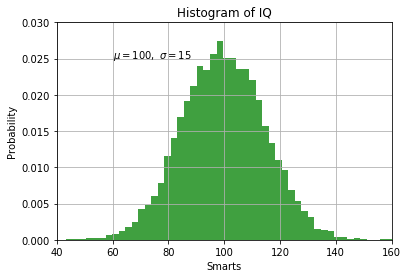

In [17]:
# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()